<font size="5">**ABHISHEK KUMAR SINGH**</font>

<font size="5">**2K19/CO/021**</font>

**<font size="8"><center>EXPERIMENT - 9</center></font>**

**AIM:** To implement correlation based feature selection technique.

**THEORY**

Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of the model. 
All of the features we find in the dataset might not be useful in building a machine learning model to make the necessary prediction. Using some of the features might even make the predictions worse. So, feature selection plays a huge role in building a machine learning model.

Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

**Pearson Correlation**

A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related. The Pearson correlation is also known as the “product moment correlation coefficient” (PMCC) or simply “correlation”.
Pearson correlations are suitable only for metric variables.

The correlation coefficient has values between -1 to 1

- A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

- A value closer to 1 implies stronger positive correlation

- A value closer to -1 implies stronger negative correlation

**P-value** 

The P value, or calculated probability, is the probability of finding the observed, or more extreme, results when the null hypothesis (H 0) of a study question is true — the definition of ‘extreme’ depends on how the hypothesis is being tested.
If the P value is less than the chosen significance level then we reject the null hypothesis i.e. accept that our sample gives reasonable evidence to support the alternative hypothesis. It does NOT imply a “meaningful” or “important” difference; that is for us to decide when considering the real-world relevance of our result.

**CODE AND OUTPUT:**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

np.random.seed(123)

In [2]:
data = pd.read_csv("cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Removing the Id and the Unnamed columns
data = data.iloc[:,1:-1]


# Encode the Categorical Variable
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

<AxesSubplot:>

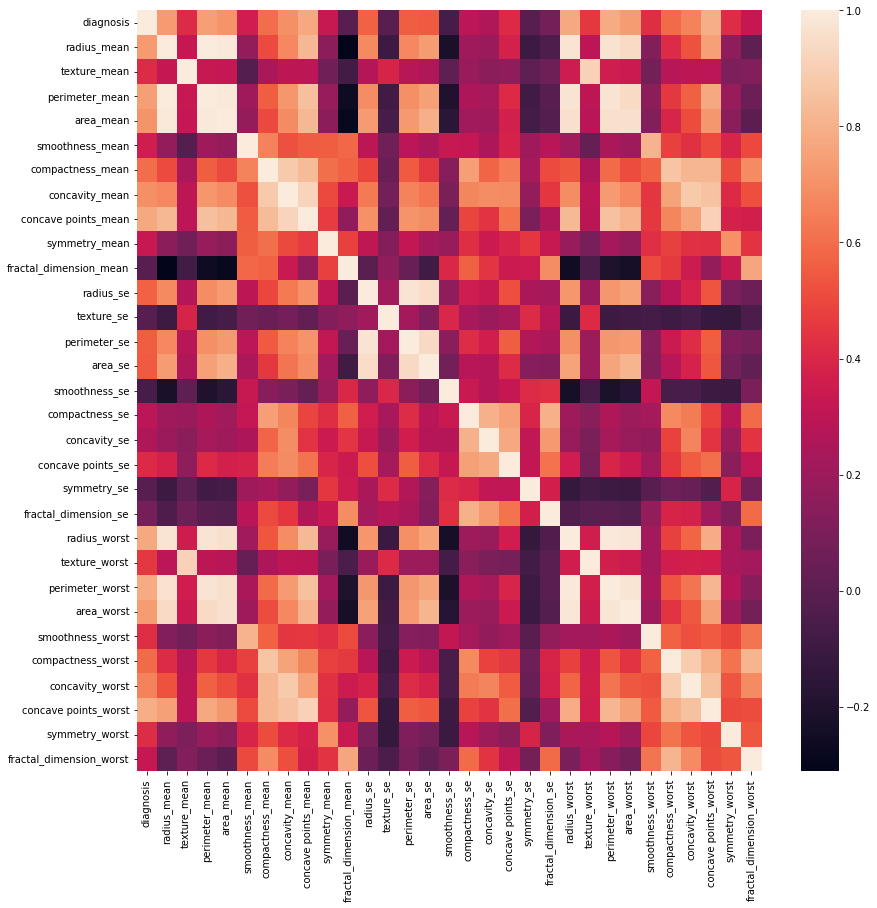

In [5]:
corr = data.corr()

plt.figure(figsize=(14,14))
sns.heatmap(corr)

In [6]:
# Select features which has correlation of above 0.5 (taking absolute value) with the output variable.

corr_target = abs(corr['diagnosis'])

relevant_features = corr_target[corr_target>0.5]
relevant_features

diagnosis               1.000000
radius_mean             0.730029
perimeter_mean          0.742636
area_mean               0.708984
compactness_mean        0.596534
concavity_mean          0.696360
concave points_mean     0.776614
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
radius_worst            0.776454
perimeter_worst         0.782914
area_worst              0.733825
compactness_worst       0.590998
concavity_worst         0.659610
concave points_worst    0.793566
Name: diagnosis, dtype: float64

In [7]:
relevant_data = data[relevant_features.index]
corr = relevant_data.corr()
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diagnosis             569 non-null    float64
 1   radius_mean           569 non-null    float64
 2   perimeter_mean        569 non-null    float64
 3   area_mean             569 non-null    float64
 4   compactness_mean      569 non-null    float64
 5   concavity_mean        569 non-null    float64
 6   concave points_mean   569 non-null    float64
 7   radius_se             569 non-null    float64
 8   perimeter_se          569 non-null    float64
 9   area_se               569 non-null    float64
 10  radius_worst          569 non-null    float64
 11  perimeter_worst       569 non-null    float64
 12  area_worst            569 non-null    float64
 13  compactness_worst     569 non-null    float64
 14  concavity_worst       569 non-null    float64
 15  concave points_worst  5

In [8]:
# Remove one of two features that have a correlation higher than 0.9

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = relevant_data.columns[columns]
relevant_data = relevant_data[selected_columns]

In [9]:
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          569 non-null    float64
 1   radius_mean        569 non-null    float64
 2   compactness_mean   569 non-null    float64
 3   concavity_mean     569 non-null    float64
 4   radius_se          569 non-null    float64
 5   compactness_worst  569 non-null    float64
 6   concavity_worst    569 non-null    float64
dtypes: float64(7)
memory usage: 31.2 KB


In [10]:
# Building a model with the selected features

y = relevant_data.iloc[:,0]
x = relevant_data.iloc[:,1:]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=4)

svc=SVC() # Default kernel used by SVC is the gaussian kernel
svc.fit(x_train, y_train)

prediction = svc.predict(x_test)

f1_score(y_test, prediction, average='weighted') 

0.8937917183531219

In [11]:
# Building a model without feature selection 

y = data.iloc[:,0]
x = data.iloc[:,1:]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=4)      

svc = SVC()
svc.fit(x_train, y_train)

prediction = svc.predict(x_test)
    
f1_score(y_test, prediction, average='weighted') 

0.869943765846841

The f1_score of the predictions is better when proper feature selection is performed.

**LEARNING OUTCOMES**

We learnt about correlation based feature selection technique.